**Types of Optimization**

In this exercise you will fill in the missing calculations for steepest descent, conjugate gradient descent, and gradient descent.

**1) steepest descent**:  calculate direction of negative gradient, step size, and new parameters

**2) conjugate gradient descent**: calculate direction of negative gradient, step size, and new parameters (same as for steepest descent)

**3) gradient descent**: calculate direction of negative gradient, try different step sizes

------
**Discussion questions**

What is the difference between these three methods?

Are they all guaranteed to converge?

Which one is likely to be the fastest?

Which one will be the most accurate? Why?

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def plot_error_surface(U, y):
  # plot quadratic error surface and steepest descent path
  E = np.zeros((100,100))
  i = 0
  for u2 in np.arange(-5,5,0.1):
    j = 0
    for u1 in np.arange(-5,5,0.1):
      E[i,j] = np.linalg.norm( X@[[u1],[u2]] - y ) # error
      j = j + 1
    i = i + 1

  fig, ax = plt.subplots(1,1,figsize=(10,10))
  ax.set(xlim=(-5,5), ylim=(-5,5))
  ax.set_aspect('equal', 'box')
  plt.grid()
  xx,yy = np.meshgrid(np.linspace(-5,5,100), np.linspace(-5,5,100))
  plt.contour(xx,yy,E,50,cmap='plasma')
  plt.scatter(u[0],u[1],c='r',s=200)
  for i in range(len(U) - 1):
    plt.plot([U[i][0],U[i+1][0]], [U[i][1],U[i+1][1]],'bo-')

In [8]:
# model
n = 20
u = 6*np.random.rand(2,1)-3 # slope and intercept
x = np.arange(-1,1,0.1).reshape((n,1)) # x-coordinate
y = u[0]*x + u[1] # y-coordinate
X = np.hstack((x, np.ones((n,1))))

# quadratic form
A = X.T @ X
b = X.T @ y

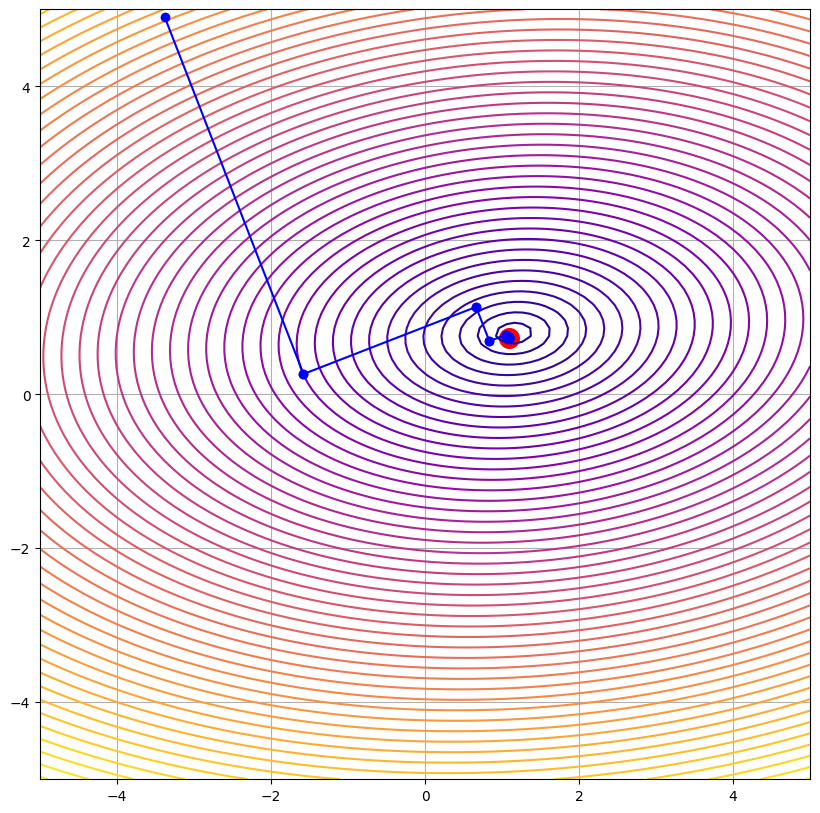

In [10]:
# steepest descent
ui = 10*np.random.rand(2,1)-5 # random starting condition
U = [ui]

while( True ):
  #ri = ?? # TODO: calculate direction of negative gradient
  ri =  A @ ui - b

  #ai = ?? # TODO: calculate step size
  ai = ri.T @ ri / (ri.T @ A @ ri)

  #uj = ?? # TODO: calculate new parameters
  uj = ui - ai * ri

  U.append(uj)
  if( np.linalg.norm(ui-uj) < 1e-3 ):
    break
  ui = uj

plot_error_surface(U, y)

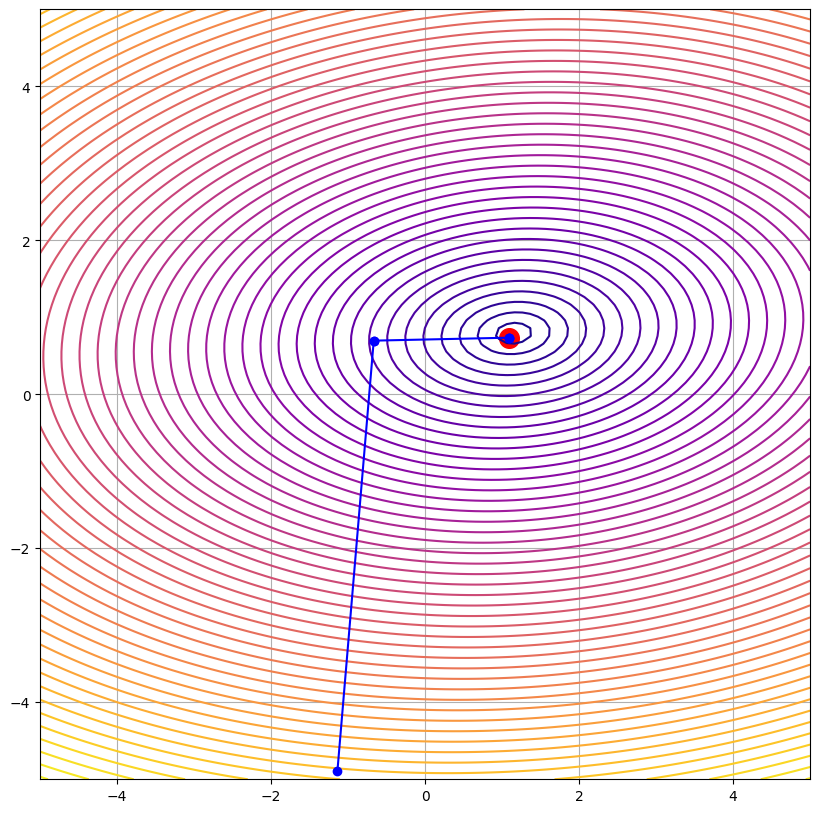

In [11]:
# conjugate gradient descent
ui = 10*np.random.rand(2,1)-5 # random starting condition
di = b - A@ui # direction of negative gradient
ri = di # initial direction
U = [ui]

while( True ):
  #ai = ?? # TODO: calculate step size
  ai = (ri.T @ ri) / (di.T @ A @ di)
  
  #uj = ?? # TODO: calculate new params
  uj = ui + ai * di

  #rj = ?? # TODO: calculate new direction
  rj = ri - ai * A @ di
  
  bj = (rj.T @ rj) / (ri.T @ ri)
  dj = rj + bj*di

  U.append(uj)
  if( np.linalg.norm(ui-uj) < 1e-3 ):
    break
  ui = uj
  ri = rj
  di = dj

plot_error_surface(U, y)

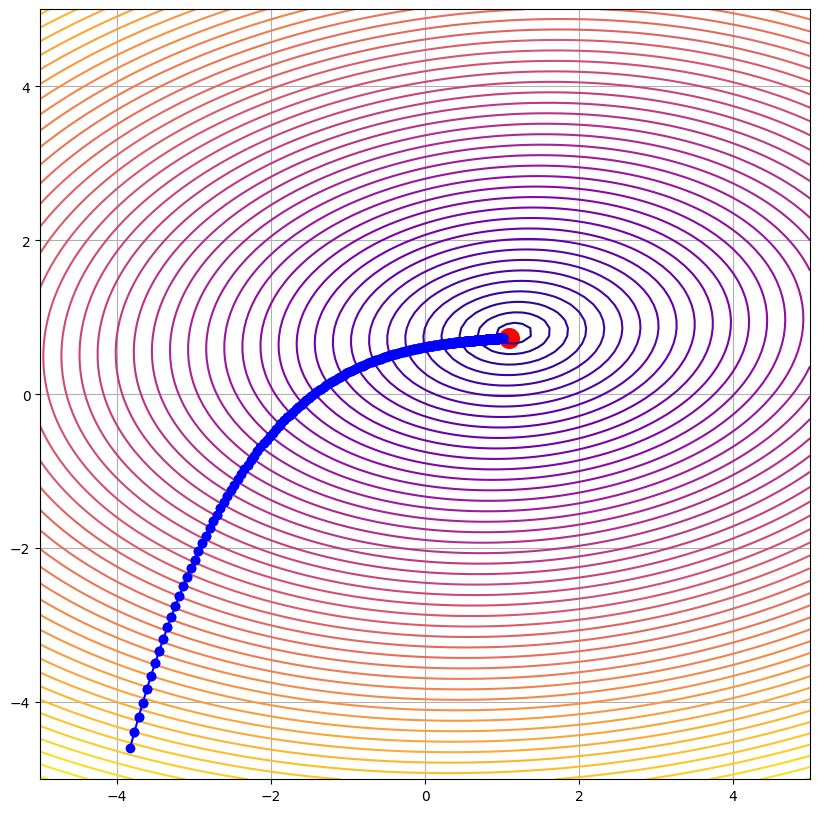

In [19]:
# gradient descent
ui = 10*np.random.rand(2,1)-5
ai = 0.002 # TODO: try different values for step size
U = [ui]

while( True ):
  #ri = ?? # TODO: calculate gradient direction
  ri = A @ ui - b
  uj = ui - ai*ri # update
  U.append(uj)
  if( np.linalg.norm(ui-uj) < 1e-3 ):
    break
  ui = uj

plot_error_surface(U, y)